<a href="https://colab.research.google.com/github/hitenmewada/Capstone-2-Rossmann-stores-sales-prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# Approach:
1. Analysis the problem statement.
2. Data Inspection.
3. EDA
4. Preprocessing.
5. Model Building.
6. Evaluate the Model.
7. Hyperparametar Tuning.
8. Conclution

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importing the dataset
Rossmann_Stores_Data = pd.read_csv('/content/drive/MyDrive/Capstone 2 - Rossmann stores sales prediction/Copy of Rossmann Stores Data.csv')
store = pd.read_csv('/content/drive/MyDrive/Capstone 2 - Rossmann stores sales prediction/Copy of store.csv')

# <b> Data Inspection

In [4]:
# First look
Rossmann_Stores_Data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
Rossmann_Stores_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
Rossmann_Stores_Data.shape

(1017209, 9)

In [ ]:
store.shape

(1115, 10)

In [ ]:
# duplicate
len(Rossmann_Stores_Data[Rossmann_Stores_Data.duplicated()])

0

In [ ]:
len(store[store.duplicated()])

0

In [ ]:
# null values 
Rossmann_Stores_Data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

# <b> EDA

In [ ]:
open_Rossmann_Stores_Data = Rossmann_Stores_Data[Rossmann_Stores_Data['Open']!=0] # removing close stores

In [ ]:
open_Rossmann_Stores_Data.shape

(844392, 9)

In [ ]:
open_Rossmann_Stores_Data['Store'].unique()

array([   1,    2,    3, ..., 1115,  876,  292], dtype=int64)

In [ ]:
merge_dataset = pd.merge(left=open_Rossmann_Stores_Data,right=store,how='outer') # merging both dataset

In [ ]:
merge_dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Store,844392.0,NaN,NaN,NaN,558.42292,321.731914,1.0,280.0,558.0,837.0,1115.0
DayOfWeek,844392.0,NaN,NaN,NaN,3.520361,1.723689,1.0,2.0,3.0,5.0,7.0
Date,844392,942,2014-01-09,1115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales,844392.0,NaN,NaN,NaN,6955.514291,3104.21468,0.0,4859.0,6369.0,8360.0,41551.0
Customers,844392.0,NaN,NaN,NaN,762.728395,401.227674,0.0,519.0,676.0,893.0,7388.0
Open,844392.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Promo,844392.0,NaN,NaN,NaN,0.446352,0.497114,0.0,0.0,0.0,1.0,1.0
StateHoliday,844392,5,0,731342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SchoolHoliday,844392.0,NaN,NaN,NaN,0.19358,0.395103,0.0,0.0,0.0,0.0,1.0
StoreType,844392,4,a,457077,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merge_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844392 non-null  int64  
 1   DayOfWeek                  844392 non-null  int64  
 2   Date                       844392 non-null  object 
 3   Sales                      844392 non-null  int64  
 4   Customers                  844392 non-null  int64  
 5   Open                       844392 non-null  int64  
 6   Promo                      844392 non-null  int64  
 7   StateHoliday               844392 non-null  object 
 8   SchoolHoliday              844392 non-null  int64  
 9   StoreType                  844392 non-null  object 
 10  Assortment                 844392 non-null  object 
 11  CompetitionDistance        842206 non-null  float64
 12  CompetitionOpenSinceMonth  575773 non-null  float64
 13  CompetitionOpenSinceYear   57

In [ ]:
merge_dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [ ]:
merge_dataset.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
844387,292,1,2013-01-07,9291,1002,1,1,0,0,a,a,1100.0,6.0,2009.0,0,NaN,NaN,NaN
844388,292,6,2013-01-05,2748,340,1,0,0,0,a,a,1100.0,6.0,2009.0,0,NaN,NaN,NaN
844389,292,5,2013-01-04,4202,560,1,0,0,1,a,a,1100.0,6.0,2009.0,0,NaN,NaN,NaN
844390,292,4,2013-01-03,4580,662,1,0,0,1,a,a,1100.0,6.0,2009.0,0,NaN,NaN,NaN
844391,292,3,2013-01-02,5076,672,1,0,0,1,a,a,1100.0,6.0,2009.0,0,NaN,NaN,NaN


In [ ]:
# encoding date
merge_dataset['Date'] = pd.to_datetime(merge_dataset['Date'], format='%Y-%m-%d')

merge_dataset['Year'] = merge_dataset['Date'].dt.year
merge_dataset['Month'] = merge_dataset['Date'].dt.month
merge_dataset['Day'] = merge_dataset['Date'].dt.day

# droping date form data frame
merge_dataset.drop('Date',axis=1,inplace=True)

In [ ]:
merge_dataset['StateHoliday'].unique()

array(['0', 0, 'a', 'b', 'c'], dtype=object)

In [ ]:
merge_dataset['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

In [ ]:
merge_dataset['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [ ]:
merge_dataset['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [ ]:
# lable encoding for encode_StateHoliday,encode_Assortment,encode_StoreType

def lable_encoding(row):
    if row == 'a':
      return 1
    elif row == 'b':
      return 2
    elif row == 'c':
      return 3
    elif row == 'd':
      return 4
    else:
      return 0

In [ ]:
merge_dataset['encode_StateHoliday']=merge_dataset.StateHoliday.apply(lambda z: lable_encoding(z))
merge_dataset['encode_Assortment']=merge_dataset.Assortment.apply(lambda z: lable_encoding(z))
merge_dataset['encode_StoreType']=merge_dataset.StoreType.apply(lambda z: lable_encoding(z))

# droping column form data frame
merge_dataset.drop(['StoreType','Assortment','StateHoliday'],inplace=True,axis=1)

In [ ]:
#Splitting PromoInterval into parts. For ex: (Jan,March,May) --> (Jan), (March), (May).

s = merge_dataset['PromoInterval'].str.split(',').apply(pd.Series, 1)
s.columns = ['PromoInterval_1', 'PromoInterval_2', 'PromoInterval_3', 'PromoInterval_4']
merge_dataset = merge_dataset.join(s)

#Converting Promointerval columns to numerical.

dict_month = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sept':9,'Oct':10,'Nov':11,'Dec':12,np.NaN:0}

merge_dataset['PromoInterval_1'] = merge_dataset['PromoInterval_1'].map(dict_month)
merge_dataset['PromoInterval_2'] = merge_dataset['PromoInterval_2'].map(dict_month)
merge_dataset['PromoInterval_3'] = merge_dataset['PromoInterval_3'].map(dict_month)
merge_dataset['PromoInterval_4'] = merge_dataset['PromoInterval_4'].map(dict_month)

merge_dataset.drop('PromoInterval',inplace=True,axis=1)

<AxesSubplot:xlabel='Sales', ylabel='Density'>

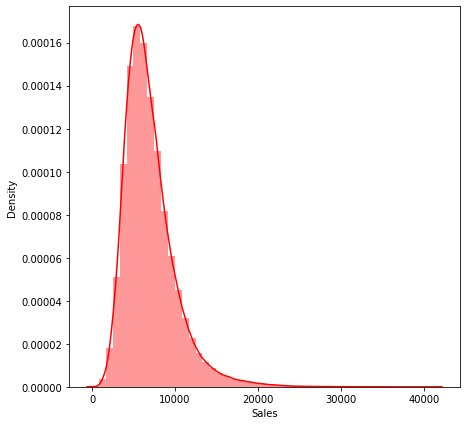

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(merge_dataset['Sales'],color="r")

observing distribution of sales data

In [ ]:
int(merge_dataset['Sales'].max())

41551

<AxesSubplot:xlabel='Sales'>

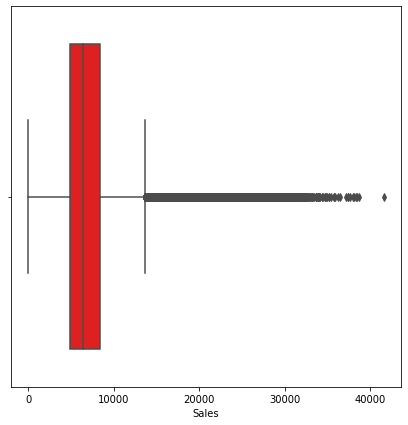

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(merge_dataset['Sales'],color="r")

looking at boxplot we can say we have some outliers.

In [ ]:
def outlier_sales(x):
  if x == 41551 : # max value of sales
    return 6369 # median
  else :
    return x

In [ ]:
merge_dataset['Sales'] = merge_dataset.Sales.apply(lambda x : outlier_sales(x)) # applying outlier_sales function 

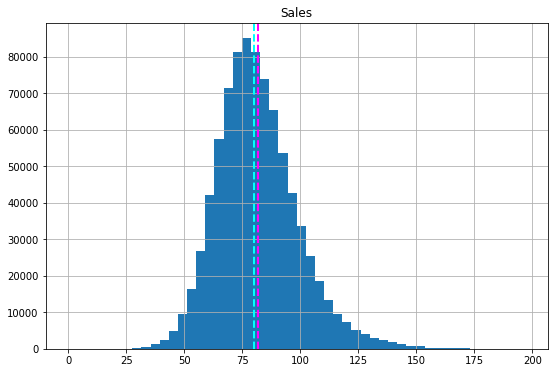

In [ ]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = np.sqrt(merge_dataset['Sales']) # square root of sales for normalize the data
feature.hist(bins=50, ax = ax)
ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
ax.set_title('Sales')
plt.show()

normalizing sales data by applying sqrt.

<AxesSubplot:xlabel='Customers', ylabel='Density'>

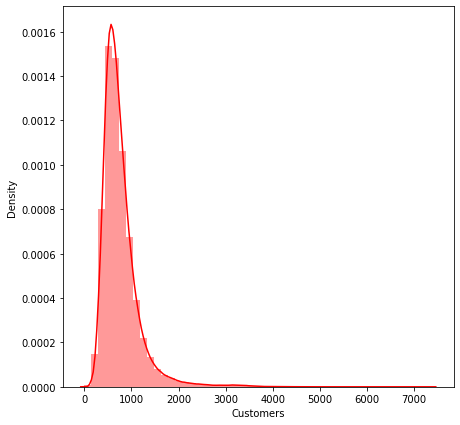

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(merge_dataset['Customers'],color="r")

looking at distplot, our customers data is not normally distributed.

<AxesSubplot:xlabel='Customers'>

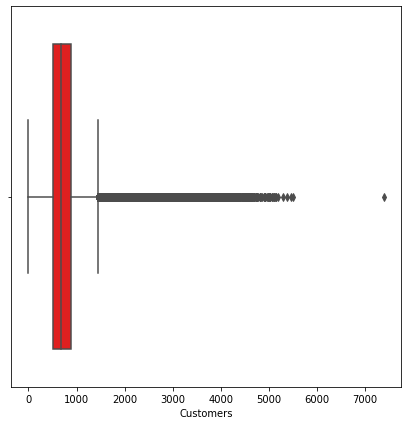

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(merge_dataset['Customers'],color="r")

with the help of bloxplot, we can say we have outliers in customers data. 

In [ ]:
merge_dataset['Customers'].max() 

7388

In [ ]:
merge_dataset['Customers'].median()

676.0

In [ ]:
def outlier_customers(x):
  if x == 7388 : # max value of customers
    return 676 # median
  else :
    return x

In [ ]:
merge_dataset['Customers'] = merge_dataset.Customers.apply(lambda x : outlier_customers(x)) # applying outlier_customers function 

<AxesSubplot:xlabel='Promo', ylabel='Density'>

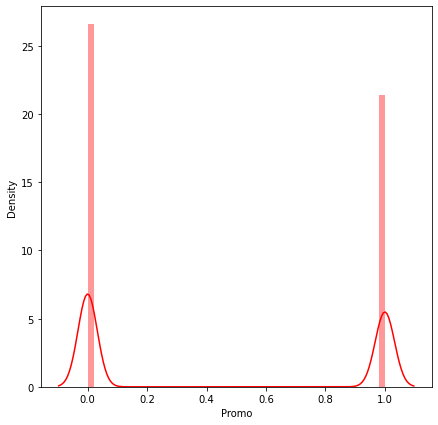

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(merge_dataset['Promo'],color="r")

promo column contains 2 values 0 and 1 , 0 means not in promotion and 1 means is in promotion.  
For more then 50% of stores are not in promotion.  

<AxesSubplot:xlabel='Promo2', ylabel='Density'>

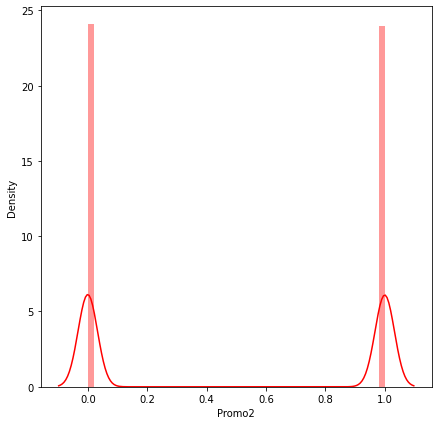

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(merge_dataset['Promo2'],color="r")

promo2 column contains 2 values 0 and 1 , 0 means not participating in promotion and 1 means participating in promotion.     
50% stores are participating on promo2. 

<AxesSubplot:xlabel='CompetitionDistance', ylabel='Density'>

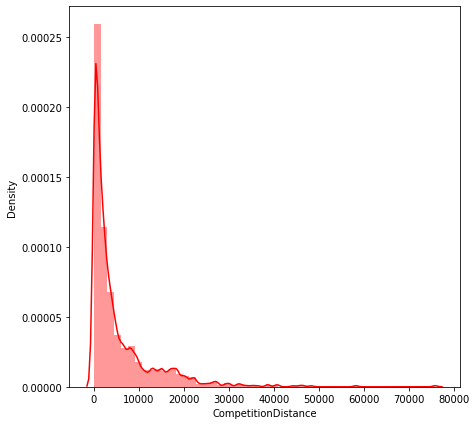

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(merge_dataset['CompetitionDistance'],color="r")

looking at distplot, our CompetitionDistance data is not normally distributed.

<AxesSubplot:xlabel='CompetitionDistance'>

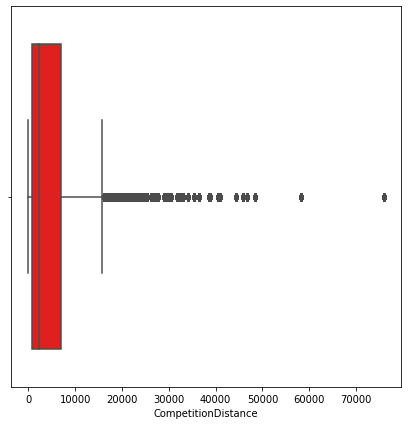

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(merge_dataset['CompetitionDistance'],color="r")

looking at boxplot , CompetitionDistance has outliers

In [ ]:
upper_limit = merge_dataset['CompetitionDistance'].quantile(.95) # extracting 95% value 
merge_dataset.loc[(merge_dataset["CompetitionDistance"] > upper_limit),"CompetitionDistance"] = upper_limit # replacing 95% value with who has more then 95% value

<AxesSubplot:xlabel='CompetitionDistance'>

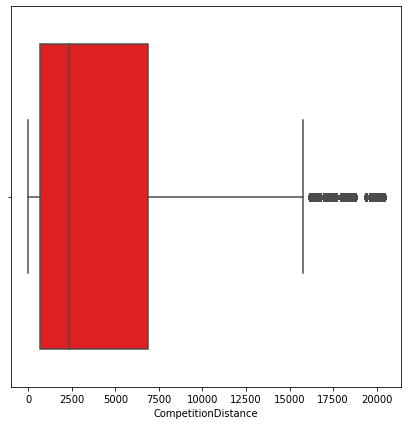

In [ ]:
plt.figure(figsize=(7,7))
sns.boxplot(merge_dataset['CompetitionDistance'],color="r")

observing boxplot after replacing 95% values and now the data is in range 

<AxesSubplot:xlabel='CompetitionOpenSinceMonth', ylabel='Density'>

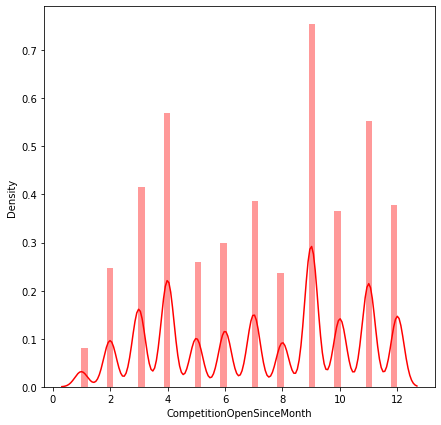

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(merge_dataset['CompetitionOpenSinceMonth'],color="r")

looking at plot we can conclude that Competition Open Since Month is not stable, In november month we have highest Competition and in january month we have lowest competition. 

<AxesSubplot:xlabel='CompetitionOpenSinceYear', ylabel='Density'>

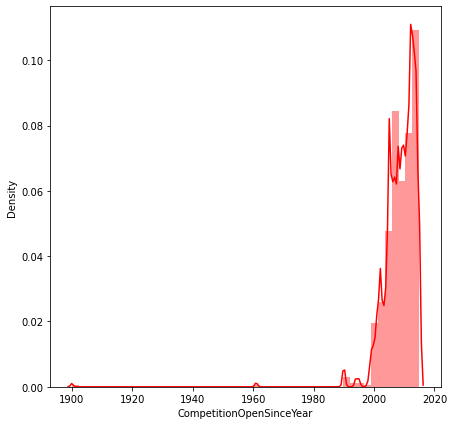

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(merge_dataset['CompetitionOpenSinceYear'],color="r")

looking at plot we did not face competition since 1990 as much but after 1990 the competition has increased exponentially. 

<AxesSubplot:>

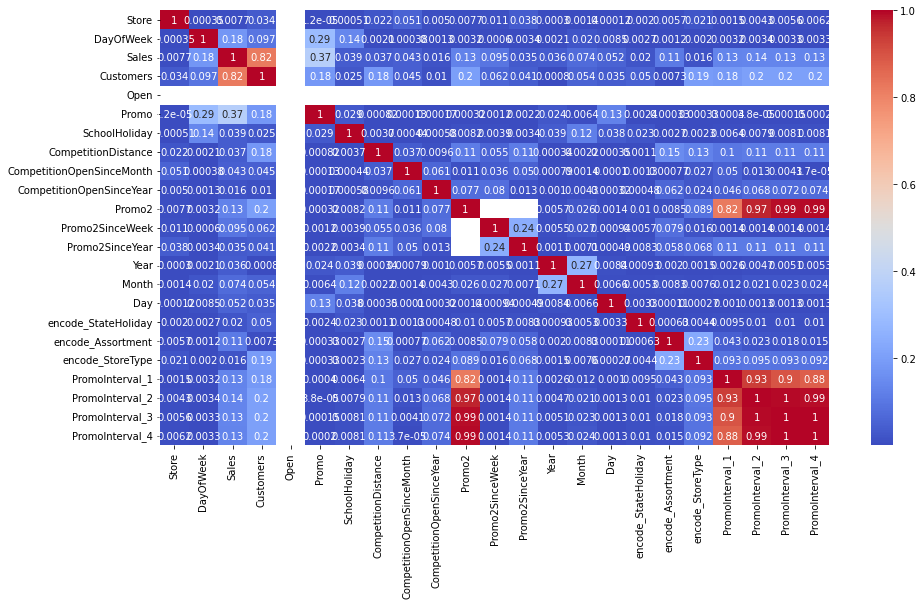

In [ ]:
plt.figure(figsize=(15,8))
correlation = merge_dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

By looking at heatmap we can conclude our data is not correlated to each other except promointervals, sales and customers.  

<AxesSubplot:xlabel='CompetitionOpenSinceYear', ylabel='Sales'>

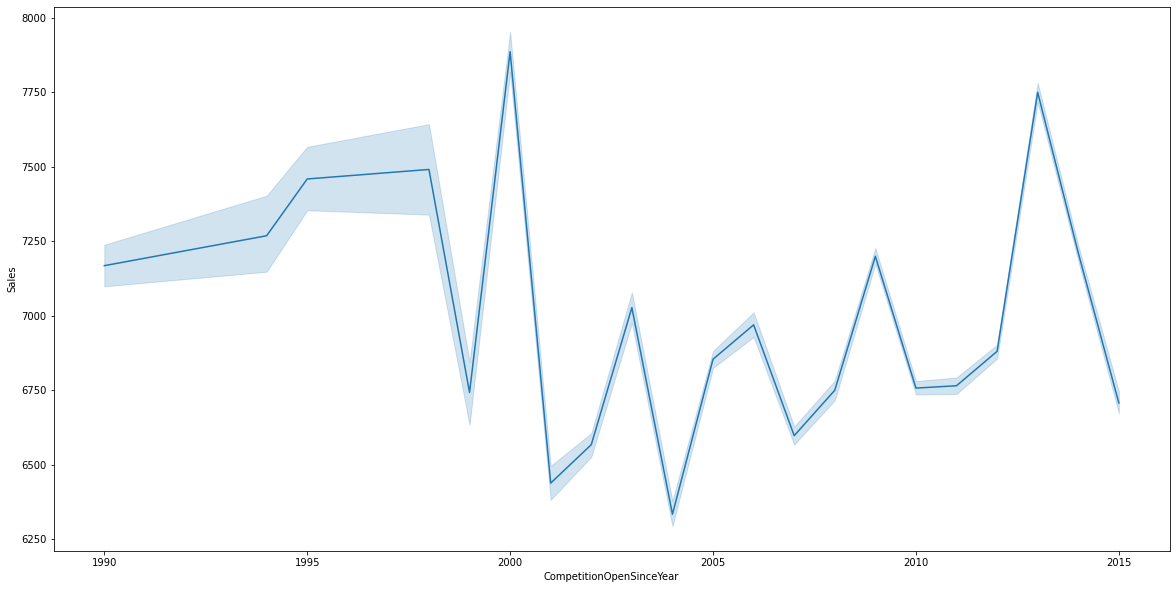

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(merge_dataset.loc[merge_dataset['CompetitionOpenSinceYear'] > 1980]['CompetitionOpenSinceYear'],merge_dataset['Sales']) # as we earlier shows we did not face competiton till 1990, so we excluding here.

Here we trying to ans the question, what is the impact of competition on sales by years ?       
We earlier shows we did not face competiton till 1990, so we excluding here.       
After 1990 our sales in not stable as befor competition.    

<AxesSubplot:xlabel='CompetitionOpenSinceMonth', ylabel='Sales'>

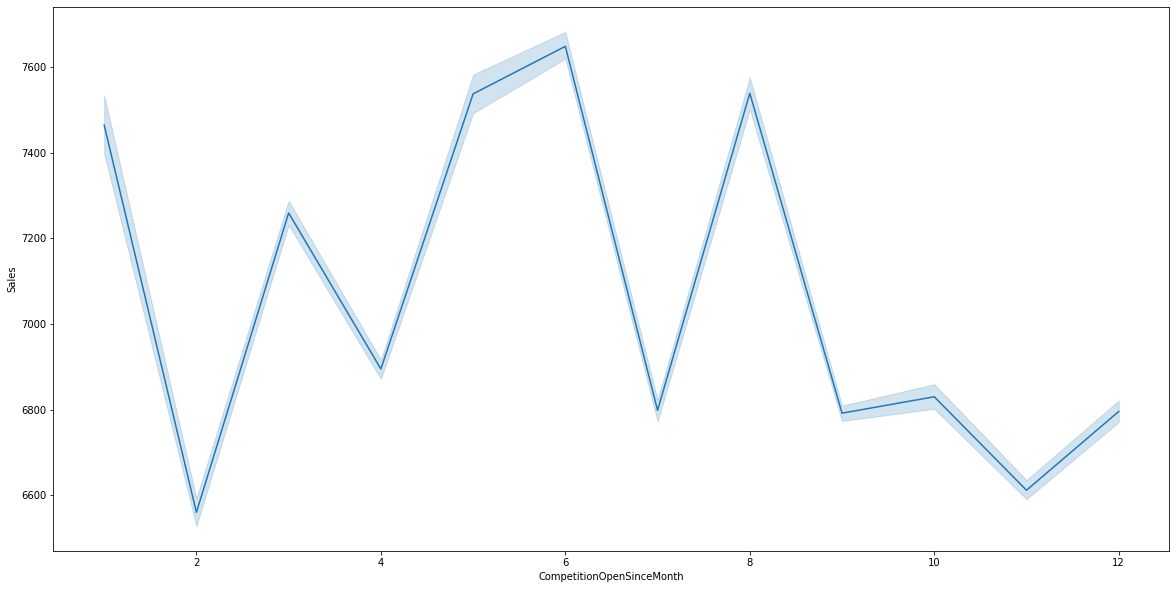

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(merge_dataset['CompetitionOpenSinceMonth'],merge_dataset['Sales'])

Here we trying to ans the question, what is the impact of competition on sales by months ?  
looking at plot we can conclued that by the month, sales in not stable and it does not have any parttens with respect to competition.

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

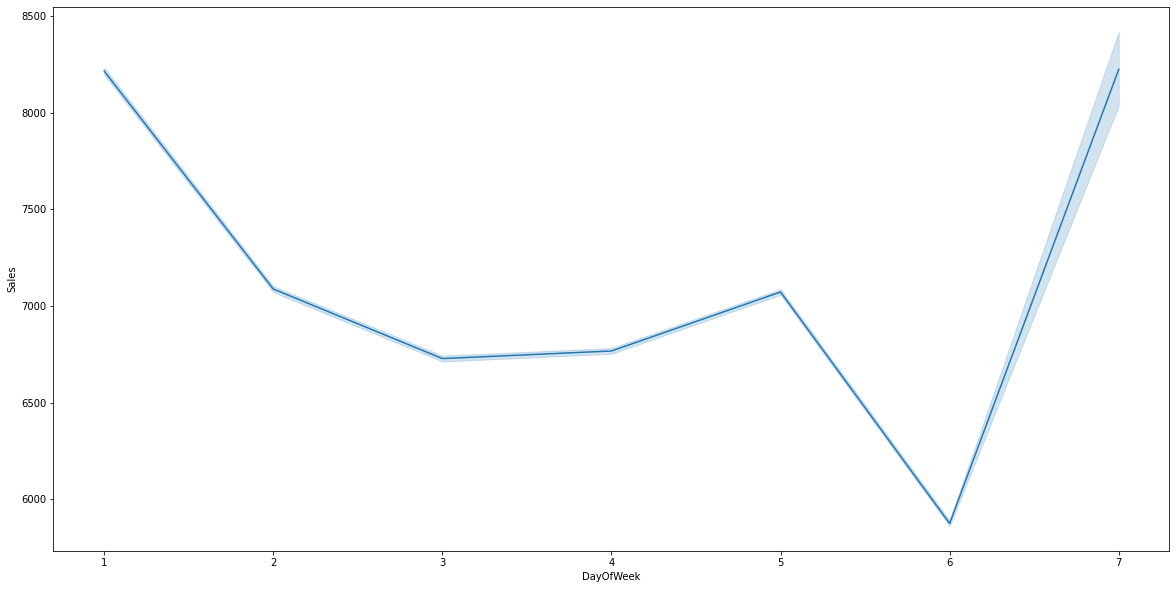

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(merge_dataset['DayOfWeek'],merge_dataset['Sales'])

Here we trying to ans the question, what is the current week day sales ?        
looking at plot we can conclued that on 1 and 7 day of week sales are at peak and at 6 day of week we arive at lowest.


<AxesSubplot:xlabel='Customers', ylabel='Sales'>

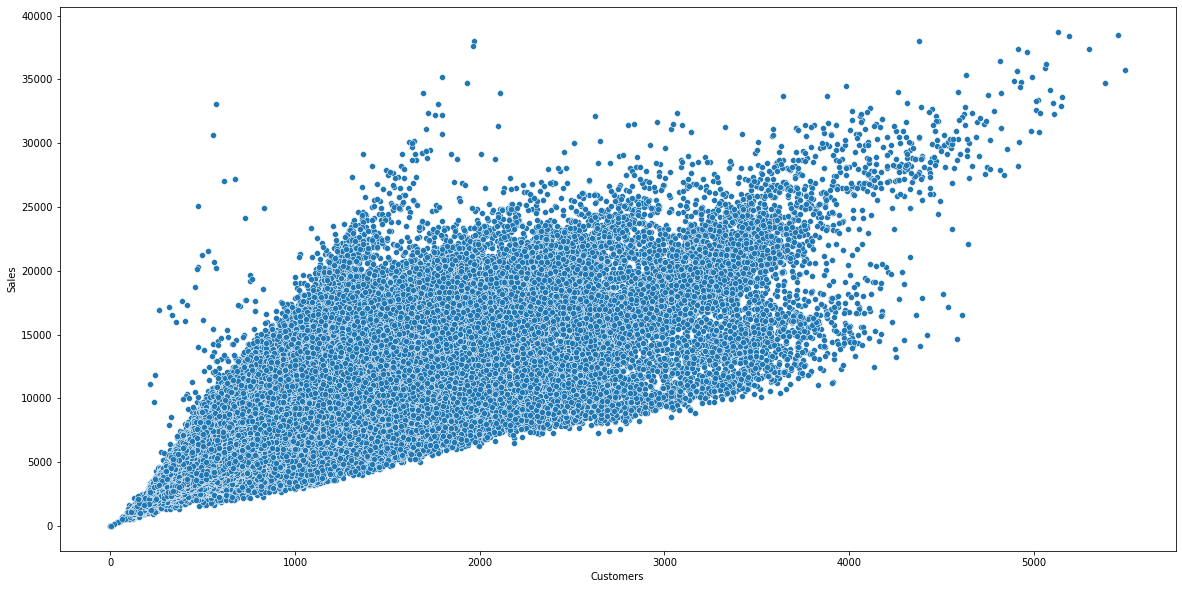

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(merge_dataset['Customers'],merge_dataset['Sales'])

looking at plot we can conclued that sales and customers have positve correlation 

In [ ]:
merge_dataset.fillna(0,inplace=True) # filling the null values with 0

In [ ]:
merge_dataset['CompetitionOpenSinceYear'] = merge_dataset['CompetitionOpenSinceYear'].astype(np.int64) # converting float data type into int

In [ ]:
merge_dataset['CompetitionOpenSinceMonth'] = merge_dataset['CompetitionOpenSinceMonth'].astype(np.int64) # converting float data type into int

In [ ]:
merge_dataset['Promo2SinceYear'] = merge_dataset['Promo2SinceYear'].astype(np.int64) # converting float data type into int

In [ ]:
merge_dataset['Promo2SinceWeek'] = merge_dataset['Promo2SinceWeek'].astype(np.int64) # converting float data type into int

# <b> Data Preparation

In [ ]:
x=merge_dataset.columns 
y=np.sqrt(merge_dataset['Sales']) # normalizing sales data by applying sqrt 

In [ ]:
x=x.drop('Sales')

In [ ]:
x=merge_dataset[x] # assigning all the pridictors variable to x

In [ ]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
# Transforming data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# <b> Implementing Regression models

In [ ]:
# Defining fuction for model and evelution matrix 
def prediction_model(x_train, x_test, y_train, y_test,regressor):
  model = regressor
  model.fit(x_train, y_train)
  score_train = model.score(x_train, y_train)
  score_test = model.score(x_test,y_test) 
  y_pred_train = model.predict(x_train)
  y_pred = model.predict(x_test)
  mean_squared_error_ = mean_squared_error((y_test)**2,(y_pred)**2)
  sqrt_mean_squared_error_train = math.sqrt(mean_squared_error((y_train)**2,(y_pred_train)**2))
  sqrt_mean_squared_error_test = math.sqrt(mean_squared_error((y_test)**2,(y_pred)**2))
  r2_score_train = r2_score((y_train)**2,(y_pred_train)**2)
  r2_score_test = r2_score((y_test)**2, (y_pred)**2)

  dict_ = {'score_train':score_train,'score_test':score_test,'y_pred_train' : (y_pred_train)**2,'y_pred':(y_pred)**2,'mean_squared_error_':mean_squared_error_,'sqrt_mean_squared_error_train':sqrt_mean_squared_error_train,
        'sqrt_mean_squared_error_test':sqrt_mean_squared_error_test,'r2_score_train':r2_score_train,'r2_score_test':r2_score_test}
  return dict_

In [ ]:
# creating models with default values
regressor = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor()]
result = {}
for i in regressor:
  result[i] = prediction_model(x_train, x_test, y_train, y_test,i)

In [ ]:
# Displaying results frame
df_result = pd.DataFrame(result)
df_result.columns = LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor()

In [ ]:
df_result

,LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor()
score_train,0.750876,1.0,0.99691,0.887592
score_test,0.748024,0.954175,0.977614,0.88588
y_pred_train,"[10049.40533553245, 7816.213254413589, 8079.77...","[12502.0, 7418.0, 6719.0, 3910.0, 3369.0, 3366...","[12329.40901658223, 7480.626202058694, 6545.04...","[11662.567580885601, 7753.471747283263, 7688.7..."
y_pred,"[6897.344050007828, 5579.611266982988, 7893.16...","[7298.0, 5601.000000000001, 9250.0, 5013.00000...","[7213.716446372922, 5386.417648883859, 8833.99...","[7700.9598590428595, 5666.928672287358, 8555.7..."
mean_squared_error_,3009144.421223,477618.311975,231463.942248,1136482.894021
sqrt_mean_squared_error_train,1721.841741,0.0,181.854469,1056.98952
sqrt_mean_squared_error_test,1734.688566,691.09935,481.106997,1066.059517
r2_score_train,0.692331,1.0,0.996568,0.884058
r2_score_test,0.687495,0.950398,0.975962,0.881974


conclution :
- Here we building 4 different models with default values and as results we found that 
    * linear regression is not performing well with 75.08% training accuracy, 74.80 % test accuracy and 3009144.421223 mean squared error.
    * Decision tree is give us 477618.311975 mean squared error, 100% accuracy in training but in test we achive only 95.41% accuracy which means our model is overfitting.
    * Random Forest is give us 231463.942248 mean squared error, 99.69% accuracy in training and also 97.76% accuracy.
    * Gradient Boosting model give us 1136482.894021 mean squared error ,88.75% accuracy in training and 88.58% accuracy.
    * From this observation our best optimum result are with Random Forest model which give us lowest means squared error with 231463.942248, 99.69% training and 97.76% testing.
- now futher improvement we are doing hyperparameter tuining on random forest and Gradient Boosting model 

# <b> Hyperparameter Tuning

In [ ]:
# defining evalution matrix fuction
def model_score(model_cv,y_test,y_predict,y_train,y_predict_train):
    mean_squared_error_ = mean_squared_error((y_test)**2, y_predict**2)
    sqrt_mean_squared_error_train = math.sqrt(mean_squared_error((y_train)**2, (y_predict_train)**2))
    sqrt_mean_squared_error_test = math.sqrt(mean_squared_error((y_test)**2, (y_predict)**2))
    r2_score_train = r2_score((y_train)**2, (y_predict_train)**2)
    r2_score_test = r2_score((y_test)**2, (y_predict)**2)
    
    dict_ = {'model_cv':model_cv,'mean_squared_error_':mean_squared_error_,'sqrt_mean_squared_error_train':sqrt_mean_squared_error_train,
             'sqrt_mean_squared_error_test':sqrt_mean_squared_error_test,'r2_score_train':r2_score_train,'r2_score_test':r2_score_test}
    return dict_

RandomForestRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV # imporing gridsearchcv 

In [ ]:
# setting hyperparameter 
rfr = RandomForestRegressor(random_state = 0)
param_grid = {'max_depth': [10,20,30], 'max_features': ['auto','log2'], 'n_estimators': [10,25,50]}
g_search = GridSearchCV(estimator = rfr, param_grid = param_grid,cv = 3, n_jobs = -1, return_train_score=True)

In [ ]:
g_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [10, 25, 50]},
             return_train_score=True)

In [ ]:
y_predict_train = g_search.predict(x_train) # predicting y train

In [ ]:
# best parameter by grid search cv
g_search.best_params_

{'max_depth': 30, 'max_features': 'auto', 'n_estimators': 50}

In [ ]:
# best score by grid search cv
g_search.best_score_

0.9756282917288167

In [ ]:
y_predict = g_search.predict(x_test) # predicting y test

In [ ]:
g_search.score(x_train, y_train)

0.9967066802082736

In [ ]:
g_search.score(x_test,y_test) 

0.9773658996490531

In [ ]:
g_search_rfr = model_score(model_cv='g_search_rfr',y_predict=y_predict,y_predict_train=y_predict_train,y_test=y_test,y_train=y_train) # model evalution results 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV # importing random search cv

In [ ]:
# setting hyperparameter
rfr = RandomForestRegressor(random_state = 0)
param_random = {'max_depth': [10,20,30], 'max_features': ['auto','log2'], 'n_estimators': [25,50,125]}
r_search = RandomizedSearchCV(estimator = rfr,param_distributions=param_random, n_iter = 50, cv = 3, n_jobs=-1, return_train_score=True)

In [ ]:
r_search.fit(x_train,y_train) # fitting data

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'max_features': ['auto', 'log2'],
                                        'n_estimators': [25, 50, 125]},
                   return_train_score=True)

In [ ]:
y_r_predict_train = r_search.predict(x_train) # predidcting y tarin

In [ ]:
r_search.best_params_ # best parameter by random search cv

{'n_estimators': 125, 'max_features': 'auto', 'max_depth': 30}

In [ ]:
r_search.best_score_ # best score 

0.9760333613435911

In [ ]:
y_r_predict = r_search.predict(x_test) # prediction y test

In [ ]:
r_search.score(x_test,y_test)

0.9776817368360688

In [ ]:
r_search.score(x_train,y_train)

0.9968877936372691

In [ ]:
r_search_rfr = model_score(model_cv='r_search_rfr',y_predict=y_r_predict,y_predict_train=y_r_predict_train,y_test=y_test,y_train=y_train) # model evalution results 

GradientBoostingRegressor 

In [ ]:
gbr = GradientBoostingRegressor(random_state = 0)
param_grid = {'learning_rate':[0.01,0.1,1,25,50,75,100],'criterion':['squared_error']}
g_gbr_search = GridSearchCV(estimator = gbr, param_grid = param_grid,cv = 3, n_jobs = -1, return_train_score=True)

In [ ]:
y_gbr_predict_train = g_gbr_search.fit(x_train, y_train)

In [ ]:
g_gbr_search.best_params_

{'criterion': 'squared_error', 'learning_rate': 1}

In [ ]:
y_train_gbr_predict = g_gbr_search.predict(x_train)

In [ ]:
g_gbr_search.best_score_

0.9419195108203505

In [ ]:
y_gbr_predict = g_gbr_search.predict(x_test)

In [ ]:
g_gbr_search.score(x_train, y_train)

0.9423589415506549

In [ ]:
g_gbr_search.score(x_test,y_test) 

0.9415802690023105

In [ ]:
g_gbr_search = model_score(model_cv='g_gbr_search',y_predict=y_gbr_predict,y_predict_train=y_train_gbr_predict,y_test=y_test,y_train=y_train) # model evalution results 

In [ ]:
gbr = GradientBoostingRegressor(random_state = 0)
param_random_gbr = {'learning_rate':[0.01,0.1,1,25,50,75,100],'alpha': [0.01,0.1,0.55,0.9],'criterion':['squared_error']}
r_gbr_search = RandomizedSearchCV(estimator = gbr,param_distributions=param_random_gbr, n_iter = 25, 
                              cv = 3, n_jobs=-1, return_train_score=True)

In [ ]:
r_gbr_search.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=0),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'alpha': [0.01, 0.1, 0.55, 0.9],
                                        'criterion': ['squared_error'],
                                        'learning_rate': [0.01, 0.1, 1, 25, 50,
                                                          75, 100]},
                   return_train_score=True)

In [ ]:
y_r_gbr_predict_train = r_gbr_search.predict(x_train)

In [ ]:
r_gbr_search.best_params_

{'learning_rate': 1, 'criterion': 'squared_error', 'alpha': 0.1}

In [ ]:
r_gbr_search.best_score_

0.9419195108203505

In [ ]:
y_r_gbr_predict = r_gbr_search.predict(x_test)

In [ ]:
r_gbr_search.score(x_train, y_train)

0.9423589415506549

In [ ]:
r_gbr_search.score(x_test,y_test) 

0.9415802690023105

In [ ]:
r_gbr_search = model_score(model_cv = 'r_gbr_search', y_predict = y_r_gbr_predict , y_predict_train = y_r_gbr_predict_train , y_test = y_test , y_train = y_train) # model evalution results 

In [ ]:
r_gbr_search

{'model_cv': 'r_gbr_search',
 'mean_squared_error_': 569251.1927324107,
 'sqrt_mean_squared_error_train': 749.8380733677661,
 'sqrt_mean_squared_error_test': 754.4873708236678,
 'r2_score_train': 0.941651111157307,
 'r2_score_test': 0.9408821956526319}

In [ ]:
hyperparameter_results = pd.DataFrame(zip(g_search_rfr.values(),r_search_rfr.values(),g_gbr_search.values(),r_gbr_search.values()),index=g_search_rfr.keys()) # creating hyperparameter result data frame

In [ ]:
hyperparameter_results 

,0,1,2,3
model_cv,g_search_rfr,r_search_rfr,g_gbr_search,r_gbr_search
mean_squared_error_,233692.527877,230629.691491,569251.192732,569251.192732
sqrt_mean_squared_error_train,187.03413,182.237838,749.838073,749.838073
sqrt_mean_squared_error_test,483.41755,480.239202,754.487371,754.487371
r2_score_train,0.99637,0.996554,0.941651,0.941651
r2_score_test,0.975731,0.976049,0.940882,0.940882


In [ ]:
df_result

,LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor()
score_train,0.750876,1.0,0.99691,0.887592
score_test,0.748024,0.954175,0.977614,0.88588
y_pred_train,"[10049.40533553245, 7816.213254413589, 8079.77...","[12502.0, 7418.0, 6719.0, 3910.0, 3369.0, 3366...","[12329.40901658223, 7480.626202058694, 6545.04...","[11662.567580885601, 7753.471747283263, 7688.7..."
y_pred,"[6897.344050007828, 5579.611266982988, 7893.16...","[7298.0, 5601.000000000001, 9250.0, 5013.00000...","[7213.716446372922, 5386.417648883859, 8833.99...","[7700.9598590428595, 5666.928672287358, 8555.7..."
mean_squared_error_,3009144.421223,477618.311975,231463.942248,1136482.894021
sqrt_mean_squared_error_train,1721.841741,0.0,181.854469,1056.98952
sqrt_mean_squared_error_test,1734.688566,691.09935,481.106997,1066.059517
r2_score_train,0.692331,1.0,0.996568,0.884058
r2_score_test,0.687495,0.950398,0.975962,0.881974


# <b> Conclution:

- For more then 50% of stores are not in promotion. 
- 50% stores are participating on promo2.   
- we did not face competition since 1990 as much but after 1990 the competition has increased exponentially.
- Competition Open Since Month is not stable, In november month we have highest Competition and in january month we have lowest competition. 
- what is the impact of competition on sales by years ?
    * we did not face competiton till 1990, After 1990 our sales in not stable as befor competition.

- what is the impact of competition on sales by months ?
    * by month, sales in not stable and it does not have any parttens with respect to competition.

- what is the current week day sales ?
    * On 1 and 7 day of week sales are at peak and at 6 day of week we arive at lowest.

- sales and customers have 0.82 positve correlation

- looking at both data frame results random forest regressor is give the best optimum results in training and testing.
- before hyperparameter tuning in random forest regressor we achive
    * mean squared error = 231463.942248
    * sqrt_mean_squared_error_train	= 181.854469	
    * sqrt_mean_squared_error_test	= 481.106997
    * r2_score_train = 0.996568
    * r2_score_test = 0.975962
                
- In hyperparameter tuning we apply 2 techniques 1 - grid search cross validation , 2 - random search cross validation , by comparing both results of tuning we find random search cross validation gives good results and the best parameter for random forest regressor is {'n_estimators': 125, 'max_features': 'auto', 'max_depth': 30}
- now we compare both the results of defult parameters vs best hyperparameters for random forest.

In [ ]:
# comparing both the results of random forest 
best_parameter_random_forest = pd.DataFrame(zip(df_result.iloc[4:,2],hyperparameter_results.iloc[1:,1]),index=hyperparameter_results.index[1:])

In [ ]:
best_parameter_random_forest.columns = 'defult parameter','best hyperparameter random search'
best_parameter_random_forest

,defult parameter,best hyperparameter random search
mean_squared_error_,231463.942248,230629.691491
sqrt_mean_squared_error_train,181.854469,182.237838
sqrt_mean_squared_error_test,481.106997,480.239202
r2_score_train,0.996568,0.996554
r2_score_test,0.975962,0.976049


- here we can see mean squared error is slightly higher in defult parameter as compare to best hyperparameter random search,
r2 score train is has slightly down in best hyperparameter random search but in r2 score test is slightly higher in best hyperparameter random search as compare to defult parameter.
- defult parameter is {'n_estimators': 100, 'max_features': 1.0, 'max_depth': None}
- our final model is random forest regressor with parameter of {'n_estimators': 125, 'max_features': 'auto', 'max_depth': 30}